In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<h1>Jhon Hendricks Bautista <br>
CPE32S3<br>
12/18/2025<br>
ENgr. Neal Matira <br><h1>

# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Examine a [dataset](https://developers.google.com/machine-learning/glossary/#data_set).
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) in building a model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 5.3 MB/s eta 0:01:02
   - -------------------------------------- 13.4/332.0 MB 40.7 MB/s eta 0:00:08
   - -------------------------------------- 14.2/332.0 MB 26.5 MB/s eta 0:00:13
   - -------------------------------------- 15.5/332.0 MB 20.7 MB/s eta 0:00:16
   -- ------------------------------------- 19.1/332.0 MB 20.0 MB/s eta 0:00:16
   -- ------------------------------------- 24.4/332.0 MB 20.9 MB/s eta 0:00:15
   --- ------------------------------------ 26.2/332.0 MB 19.7 MB/s eta 0:00:16
   --- ------------------------------------ 27.5/332.0 MB 17.9 MB/s eta 0:00:18
   --- ------------------------------------ 29.9/332.0 MB 17.2 MB/s eta 0:00:18
   --- ------------------------------------ 31.5/332.0 MB 16.1 MB/s eta 0:00:19
   ---- ----------------------------------- 38.5/332.0 MB 17.7 MB/s eta 0:00:17
   ------ --------------------------------- 54.3/33

In [3]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

c:\Users\Win10\anaconda3\envs\gigaman\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values).

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [15]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [16]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data?

<h3> Based on the output of the program above, I can say that there are anomalies regarding the max values of the columns such as the total rooms, total bedrooms, households and population. There is a big gap in the  75% percentile and the max value which may indicate that there are many very large data points. This also cause a high standard deviation value in these columns, this can be considered as outliers or just shows the big difference of housing properties in the area. 

In [7]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you
# might be able to represent (pre-process) raw data
# in order to make columns into useful features.

In [17]:
training_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [18]:
training_df.loc[training_df['total_rooms'].idxmax()]

longitude             -117.7
latitude                33.9
housing_median_age       4.0
total_rooms          37937.0
total_bedrooms        5471.0
population           16122.0
households            5189.0
median_income            7.5
median_house_value     366.3
Name: 2871, dtype: float64

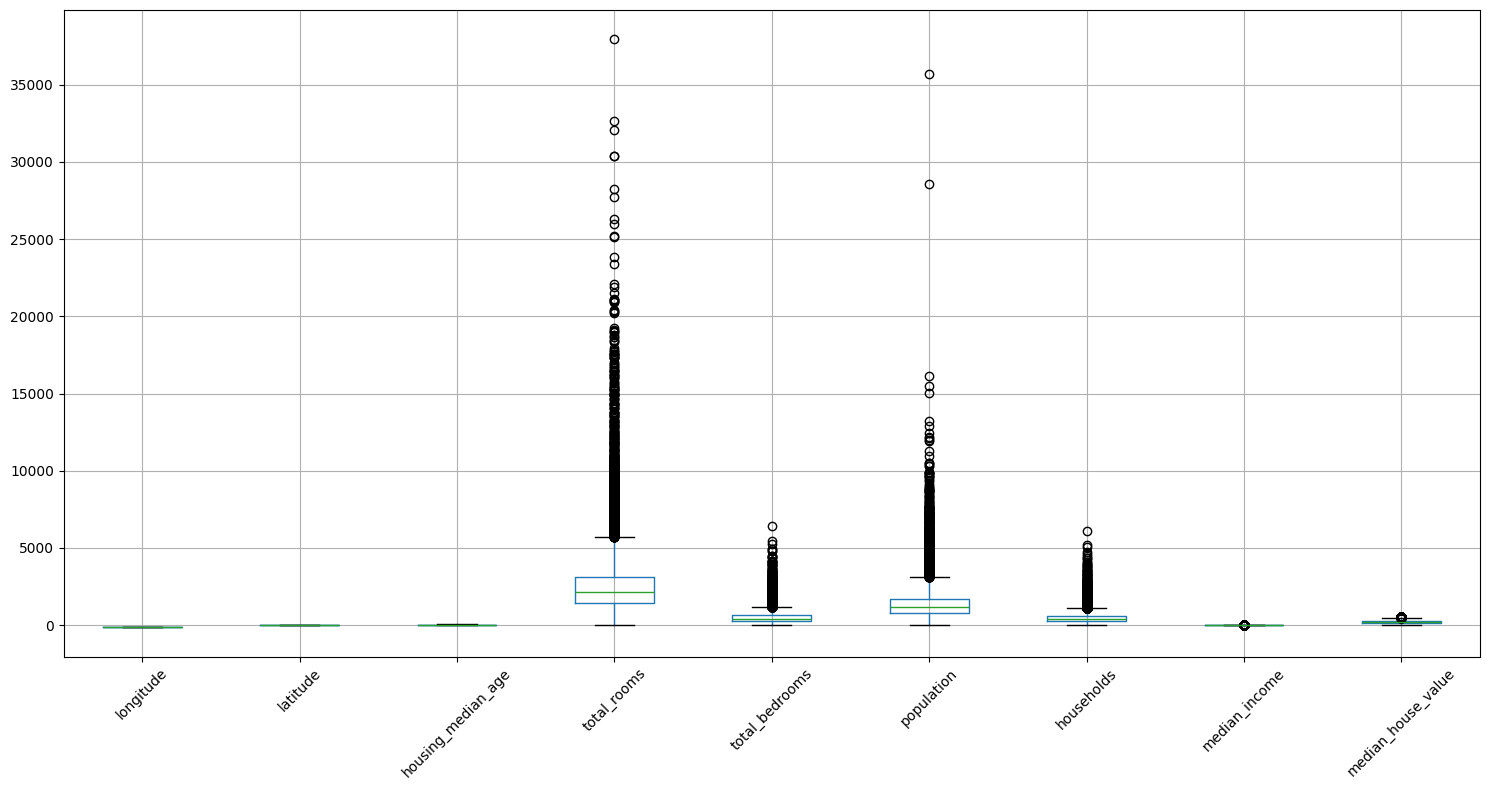

In [19]:
import matplotlib.pyplot as plt

training_df.boxplot(figsize=(15, 8))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Based on the output box plot per column I can say that the data has many outliers because of the many plot points beyound the average especially on the total_rooms feature. <h3>

In [20]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [38]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.

    # Input layer and first hidden layer
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    # Hidden layers
               
  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0][0][0]
  trained_bias = model.get_weights()[1][0]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


i changed some of the code in the model mainly the optimizer used and the extraction of the training weights and bias. This is to fix some errors after training.

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [32]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""
  trained_weight = trained_weight.item()
  trained_bias = trained_bias.item()
  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.


Epoch 1/30


c:\Users\Win10\anaconda3\envs\gigaman\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 110293.8672 - root_mean_squared_error: 332.1052
Epoch 2/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27469.2754 - root_mean_squared_error: 165.7386
Epoch 3/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27492.5879 - root_mean_squared_error: 165.8089
Epoch 4/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27092.1230 - root_mean_squared_error: 164.5968
Epoch 5/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26683.3398 - root_mean_squared_error: 163.3504
Epoch 6/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26356.5938 - root_mean_squared_error: 162.3471
Epoch 7/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25826.1973 - root_mean_squared_error: 160.7053
Epoch 8/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25410.4707 - root_mean_squared_error: 159.4066
Epoch 9/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25034.0527 - root_mean_squared_error: 158.2215
Epoch 10/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms

C:\Users\Win10\AppData\Local\Temp\ipykernel_13652\1906225841.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nThe learned weight for your model is %.4f" % weight)
C:\Users\Win10\AppData\Local\Temp\ipykernel_13652\1906225841.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The learned bias for your model is %.4f\n" % bias )


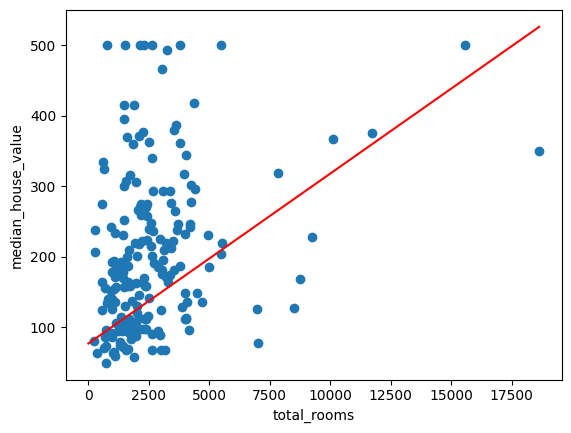

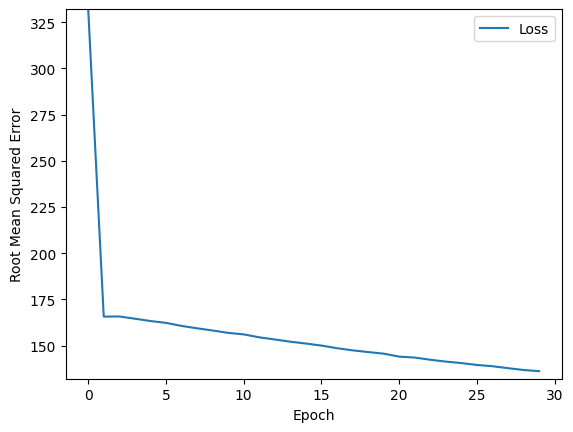

In [33]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [34]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [35]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             125
 3400     92             159
 3677     69             166
 2202     62             130
 2403     80             135
 5652    295             213
 3318    500             157
 2552    342             139
 1364    118             110
 3468    128             161


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

<h3>Based on the output of the model above, I can say that in some of the predictions it came close but there is still an observable errors in some of the predictions and there is a large gap in its predictions especially when doing a prediction on a very low or very high value. This is where the model has a hard time generating accurate predictions and here it reflects the high RMSE value of the model during the evaluation.<h3>

In [ ]:
#@title Double-click to view the answer.

# Most of the predicted values differ significantly
# from the label value, so the trained model probably
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of
# the rest of the examples.

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/128


c:\Users\Win10\anaconda3\envs\gigaman\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4374865.0000 - root_mean_squared_error: 2091.6177
Epoch 2/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1264992.6250 - root_mean_squared_error: 1124.7189
Epoch 3/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 150432.9375 - root_mean_squared_error: 387.8568
Epoch 4/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 33600.3750 - root_mean_squared_error: 183.3040
Epoch 5/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 32030.7012 - root_mean_squared_error: 178.9712
Epoch 6/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 31069.1328 - root_mean_squared_error: 176.2644
Epoch 7/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30333.0918 - root_mean_squared_error: 174.1640
Epoch 8/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 29515.1367 - root_mean_squared_error: 171.7997
Epoch 9/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 28788.0234 - root_mean_squared_error: 169.6703
Epoch 10/128
10

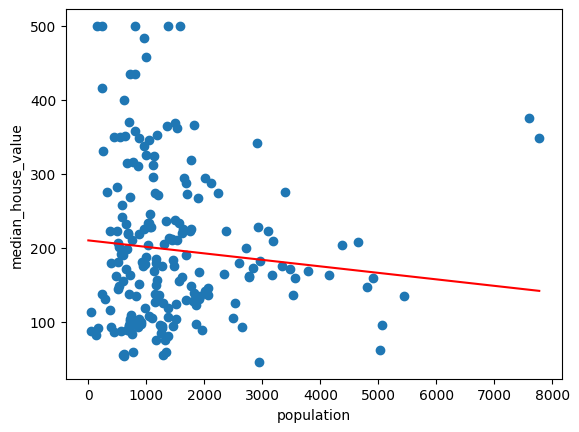

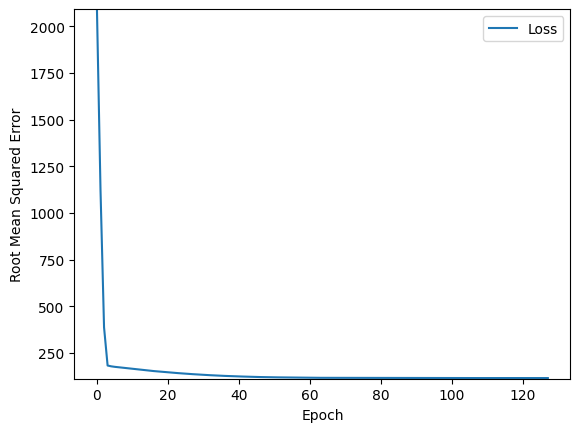

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             199
 1867     92             193
 2191     69             191
 1052     62             201
 1647     80             195
 2312    295             190
 1604    500             196
 1066    342             201
  338    118             207
 1604    128             196
 1200    187             199
  292     80             207
 2014    112             192
 1817     95             194
 1328     69             198


In [40]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.01
epochs = 128
batch_size = 16

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/18


c:\Users\Win10\anaconda3\envs\gigaman\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5667/5667 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 71797.6562 - root_mean_squared_error: 267.9508 
Epoch 2/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 957us/step - loss: 21412.5391 - root_mean_squared_error: 146.3302
Epoch 3/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 17343.1836 - root_mean_squared_error: 131.6935
Epoch 4/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 6s 998us/step - loss: 15188.7461 - root_mean_squared_error: 123.2426
Epoch 5/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 859us/step - loss: 14188.4229 - root_mean_squared_error: 119.1152
Epoch 6/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 826us/step - loss: 13987.1953 - root_mean_squared_error: 118.2675
Epoch 7/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - loss: 13926.4404 - root_mean_squared_error: 118.0103
Epoch 8/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 846us/step - loss: 13802.8682 - root_mean_squared_error: 117.4856
Epoch 9/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 837us/step - loss: 13871.1182 - root_mean_squared_error: 117.7757
Epoch 10/18
5

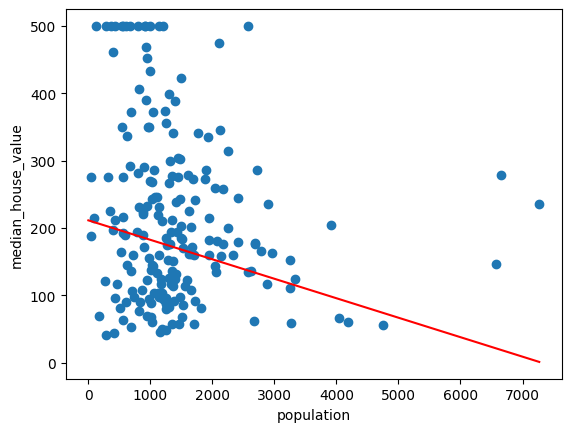

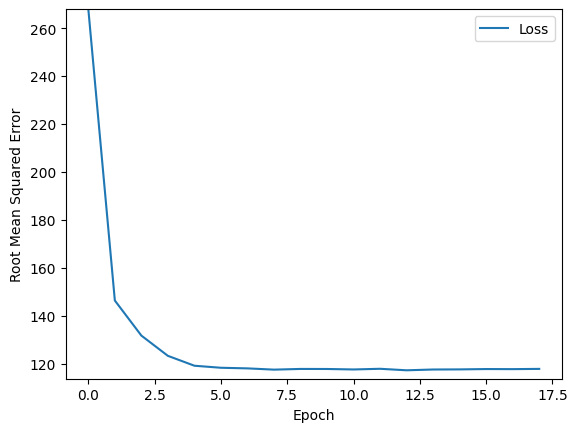

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             174
 1867     92             157
 2191     69             148
 1052     62             181
 1647     80             164
 2312    295             144
 1604    500             165
 1066    342             181
  338    118             202
 1604    128             165


In [39]:
#@title Double-click to view a possible solution.

my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Did `population` produce better predictions than `total_rooms`?

<h3> Based on the history of the two models and their predictions they have almost the same performance which is being weak. Both of the models have very large errors in their peredictions. Also in comparing their plots regarding the RMSE over their epochs, even though they have different configurations, they have almost the same output of having around 120 value.<h3>

In [ ]:
#@title Double-click to view the answer.

# Training is not entirely deterministic, but population
# typically converges at a slightly higher RMSE than
# total_rooms.  So, population appears to be about
# the same or slightly worse at making predictions
# than total_rooms.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

Epoch 1/128


c:\Users\Win10\anaconda3\envs\gigaman\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 54461.6914 - root_mean_squared_error: 233.3703
Epoch 2/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 47361.8672 - root_mean_squared_error: 217.6278
Epoch 3/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40394.6406 - root_mean_squared_error: 200.9842
Epoch 4/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35269.0195 - root_mean_squared_error: 187.8005
Epoch 5/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31684.8984 - root_mean_squared_error: 178.0025
Epoch 6/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28844.1289 - root_mean_squared_error: 169.8356
Epoch 7/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26396.2246 - root_mean_squared_error: 162.4691
Epoch 8/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24474.7051 - root_mean_squared_error: 156.4439
Epoch 9/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22742.4551 - root_mean_squared_error: 150.8060
Epoch 10/128
1063/1063

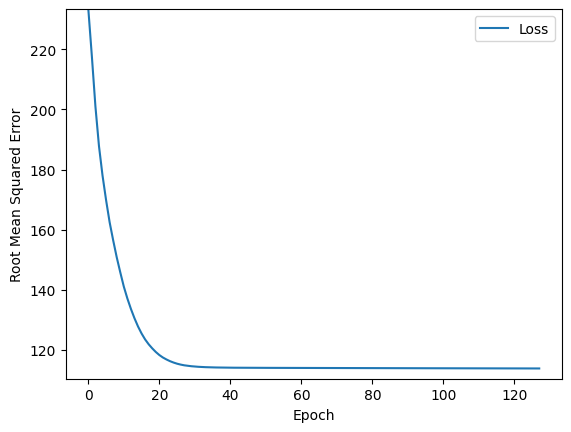

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             194
    2     92             202
    2     69             198
    2     62             210
    1     80             192
    2    295             220
    2    500             209
    2    342             219
    4    118             265
    2    128             212
    2    187             219
    3     80             227
    2    112             220
    2     95             216
    2     69             210


In [41]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = (
    training_df["total_rooms"] / training_df["population"]
)
 # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.01
epochs = 128
batch_size = 16

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

<h3>Based on the output above even if we used a new feature the model is still unable to have a better performance and it still have big error in predicting the value.<h3>

In [ ]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [24]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0


In [26]:
!pip install seaborn


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import seaborn as sns



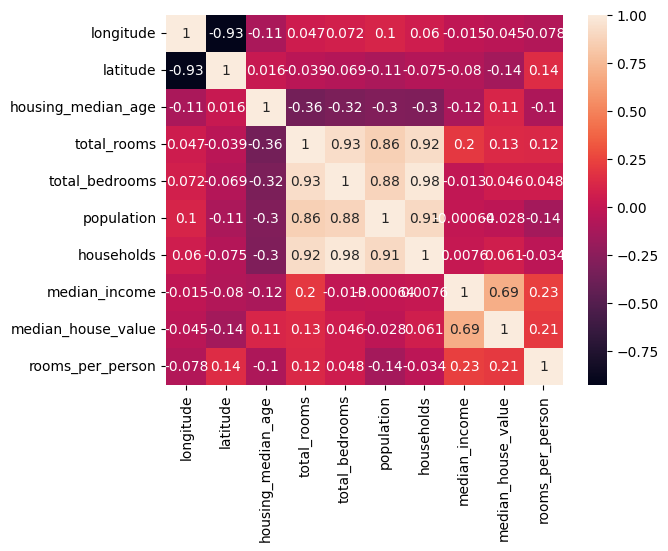

In [46]:
sns.heatmap(training_df.corr(), annot = True)
plt.show()

The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

<h3>Based on the heatmap about the correlation of the different features in the dataset. I can observe that the median_income has the highest out of all which has a 0.69 correlation value which is a moderate positive correlation. This can prove to be a viable feature for the model which can improve its performance. There are no other candidate features since almost all of them are close to zero so including them may just become noise for the model.

Epoch 1/128


c:\Users\Win10\anaconda3\envs\gigaman\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 48210.3008 - root_mean_squared_error: 219.5684
Epoch 2/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 36103.1172 - root_mean_squared_error: 190.0082
Epoch 3/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25939.2344 - root_mean_squared_error: 161.0566
Epoch 4/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18159.3906 - root_mean_squared_error: 134.7568
Epoch 5/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12676.7754 - root_mean_squared_error: 112.5912
Epoch 6/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9487.6982 - root_mean_squared_error: 97.4048  
Epoch 7/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7853.8706 - root_mean_squared_error: 88.6221
Epoch 8/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7239.5464 - root_mean_squared_error: 85.0855
Epoch 9/128
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7065.5171 - root_mean_squared_error: 84.0566
Epoch 10/128
1063/1063 ━━━━━

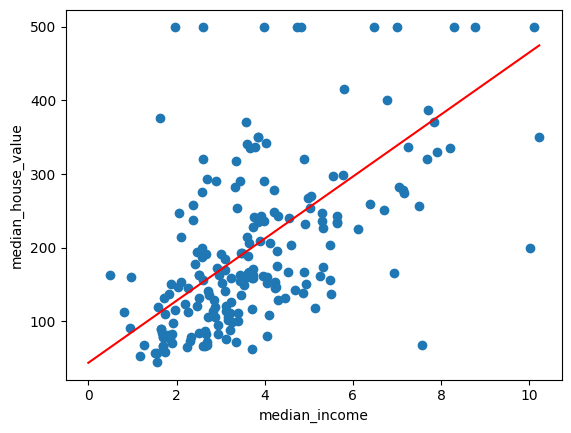

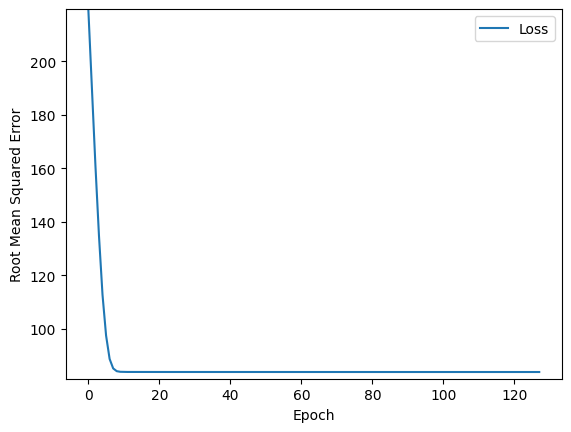

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             212
    3     69             154
    2     62             132
    3     80             154
    2    295             148
   10    500             456
    5    342             260
    2    118             147
    4    128             221
    8    187             396
    3     80             163
    3    112             179
    4     95             221
    2     69             143


In [ ]:
my_feature = "median_income"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.01
epochs = 128
batch_size = 16

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label) .

<h3>Based on the output of the model in using the median_income feature, I can observe that the RMSE dropped significantly. When observing the predictions of the model, now we can see better results since more of the predictions are closers than before. In the loss graph it reached its lowest out of all the tries previously which is around 83 RMSE value. based on this results, using this feature that has a higher correlation can significantly improve the models predictive power.

In [ ]:
#@title Double-click here for the solution to Task 5

# The median_income correlates 0.7 with the label
# (median_house_value), so median_income might be a
# good feature. The other seven potential features
# all have a correlation relatively close to 0.

# If time permits, try median_income as the feature
# and see whether the model improves.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.

<h1>CONCLUSION<h1>
<h4>After performing this activity I learned more about using tensorflow with realk life dataset. In this activity I learned a new structure making a model which is the sequential model and being able to utilize the pandas library to handle different data manipulation or data exploration which can be beneficial for making the model. This is done when trying to explore different feature in the dataset to see which would make the model better and having to show the correlation of each feature proved important. In conclusion, this activity helped me improve my skills in pandas and learn more about the different tensorflow functions for making a model.<h3>